
 Vanishing Gradients 
Final Loss: 0.749471
Layer 09 | Grad Norm: 1.2243e+01 | Min: -3.13e+00 | Max: 5.24e+00
Layer 08 | Grad Norm: 8.7642e-01 | Min: -2.85e-01 | Max: 2.18e-01
Layer 07 | Grad Norm: 7.0111e-02 | Min: -2.98e-02 | Max: 2.57e-02
Layer 06 | Grad Norm: 5.0023e-03 | Min: -1.28e-03 | Max: 2.27e-03
Layer 05 | Grad Norm: 3.7993e-04 | Min: -1.29e-04 | Max: 1.04e-04
Layer 04 | Grad Norm: 2.8557e-05 | Min: -8.48e-06 | Max: 9.37e-06
Layer 03 | Grad Norm: 2.1061e-06 | Min: -7.60e-07 | Max: 6.44e-07
Layer 02 | Grad Norm: 1.7762e-07 | Min: -6.62e-08 | Max: 6.04e-08
Layer 01 | Grad Norm: 1.1576e-08 | Min: -3.29e-09 | Max: 4.99e-09
Layer 00 | Grad Norm: 7.7610e-10 | Min: -2.68e-10 | Max: 3.05e-10

 Exploding Gradients 
Final Loss: 34668618591683760619520.000000
Layer 09 | Grad Norm: 2.6332e+12 | Min: -6.98e+11 | Max: 7.88e+11
Layer 08 | Grad Norm: 5.1193e+13 | Min: -1.83e+13 | Max: 1.66e+13
Layer 07 | Grad Norm: 8.5839e+14 | Min: -3.32e+14 | Max: 2.47e+14
Layer 06 | Grad Norm: 1.4228e+16

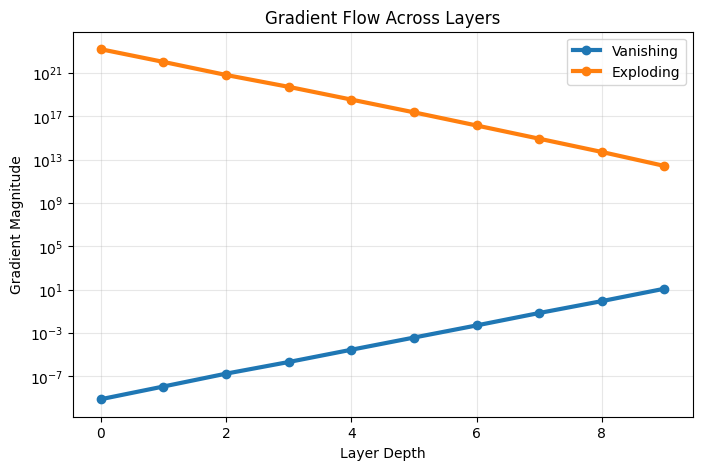

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# settings
num_layers = 10
layer_size = 50
input_dim = 50

X = np.random.randn(1, input_dim)
y = np.random.randn(1, layer_size)

# forward + backward pass
def run_network(weight_scale, name):
    print(f"\n {name} ")

    weights = [
        np.random.randn(layer_size, layer_size) * weight_scale
        for _ in range(num_layers)
    ]
    weights[0] = np.random.randn(input_dim, layer_size) * weight_scale

    # forward
    activations = [X]
    for W in weights:
        activations.append(activations[-1] @ W)

    loss = np.mean((activations[-1] - y) ** 2)
    print(f"Final Loss: {loss:.6f}")

    # backward
    grad = 2 * (activations[-1] - y)
    grad_norms = []

    for i in reversed(range(num_layers)):
        norm = np.linalg.norm(grad)
        grad_norms.append(norm)

        print(
            f"Layer {i:02d} | "
            f"Grad Norm: {norm:.4e} | "
            f"Min: {grad.min():.2e} | "
            f"Max: {grad.max():.2e}"
        )

        grad = grad @ weights[i].T

    return grad_norms[::-1]

# run both cases
vanishing = run_network(0.01, "Vanishing Gradients")
exploding = run_network(2.0, "Exploding Gradients")

# visualization
plt.figure(figsize=(8,5))
plt.plot(vanishing, marker="o", linewidth=3, label="Vanishing")
plt.plot(exploding, marker="o", linewidth=3, label="Exploding")

plt.xlabel("Layer Depth")
plt.ylabel("Gradient Magnitude")
plt.title("Gradient Flow Across Layers")
plt.yscale("log")
plt.grid(alpha=0.3)
plt.legend()
plt.show()